### #6. after logger.py

# Neural Networks to predict Kidney Disease

### Data info



#### We use the following representation to collect the dataset
* age - age
* bp - blood pressure
* sg - specific gravity
* al - albumin
* su - sugar
* rbc - red blood cells
* pc - pus cell
* pcc - pus cell clumps
* ba - bacteria
* bgr - blood glucose random
* bu - blood urea
* sc - serum creatinine
* sod - sodium
* pot - potassium
* hemo - hemoglobin
* pcv - packed cell volume
* wc - white blood cell count
* rc - red blood cell count
* htn - hypertension
* dm - diabetes mellitus
* cad - coronary artery disease
* appet - appetite
* pe - pedal edema
* ane - anemia
* class - class

### Feature engineerings and preproccesing

### 1. load Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

### To solve kernel error 
### Reinstall ipykernel  in venv  with the following command in conda prompt
* python -m pip install ipykernel
* python -m ipykernel install --user

In [2]:
import os ,sys  #system related settings
import numpy as np #cocmpute numerical
import pandas as pd #create dataframe
# import lux
import seaborn as sns #create visualization
sns.set()
import  matplotlib.pyplot as plt #create figure and axes

In [3]:
from sklearn import  preprocessing
from sklearn.impute import  SimpleImputer
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import  StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer

### 2. Load Data

In [4]:
df = pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', None)
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
# df1 = pd.DataFrame(df)
# df1

In [6]:
df.drop(columns=['id'], axis=1, inplace=True) ## if add inplace true dont assign 
print(df)


      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   d

In [7]:
# print(df1)

### shape

In [8]:
df.shape

(400, 25)

### 3. Dataset info and datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

### insight: wc ,rc ,pcv dtype wrong

In [10]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
df.columns.unique()

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
## Check Duplicates columns  in a dataframe
df.duplicated().sum()

0

In [13]:
## check the number of unique values  in a column
df.nunique()

age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                44
wc                 92
rc                 49
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

### 3. Find null values in the dataset

In [14]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### 4. Define Numerical and Categorical Columns

In [15]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
num_cols

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [16]:
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O' ]
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [17]:
from sklearn.compose import  make_column_selector as selector

# num_col_select = selector(dtype_include=np.number)
# cat_col_select = selector(dtype_exclude=np.number)


# num_col_select = selector(dtype_exclude='object')
# cat_col_select = selector(dtype_include='object')

# num_columns = num_col_select(df)
# cat_columns = cat_col_select(df)


In [18]:
# num_columns


In [19]:
num_df = df.select_dtypes(exclude='object')
num_df


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2


In [20]:
cat_df = df.select_dtypes(include='object')
cat_df

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


### 5. Handle missing value using imputer

In [21]:
imp_num= SimpleImputer(missing_values=np.nan, strategy='median')
imp_num_df  = imp_num.fit_transform(num_df)
imp_num_df

array([[ 48.   ,  80.   ,   1.02 , ..., 138.   ,   4.4  ,  15.4  ],
       [  7.   ,  50.   ,   1.02 , ..., 138.   ,   4.4  ,  11.3  ],
       [ 62.   ,  80.   ,   1.01 , ..., 138.   ,   4.4  ,   9.6  ],
       ...,
       [ 12.   ,  80.   ,   1.02 , ..., 137.   ,   4.4  ,  15.8  ],
       [ 17.   ,  60.   ,   1.025, ..., 135.   ,   4.9  ,  14.2  ],
       [ 58.   ,  80.   ,   1.025, ..., 141.   ,   3.5  ,  15.8  ]])

In [22]:
imp_cat= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat_df  = imp_cat.fit_transform(cat_df)
imp_cat_df

array([['normal', 'normal', 'notpresent', ..., 'no', 'no', 'ckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'ckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'yes', 'ckd'],
       ...,
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd'],
       ['normal', 'normal', 'notpresent', ..., 'no', 'no', 'notckd']],
      dtype=object)

### add num and cat in one dataframe (arrays)

In [23]:
final_df = np.c_[imp_num_df,imp_cat_df]

In [24]:
final_df

array([[48.0, 80.0, 1.02, ..., 'no', 'no', 'ckd'],
       [7.0, 50.0, 1.02, ..., 'no', 'no', 'ckd'],
       [62.0, 80.0, 1.01, ..., 'no', 'yes', 'ckd'],
       ...,
       [12.0, 80.0, 1.02, ..., 'no', 'no', 'notckd'],
       [17.0, 60.0, 1.025, ..., 'no', 'no', 'notckd'],
       [58.0, 80.0, 1.025, ..., 'no', 'no', 'notckd']], dtype=object)

### Add columns to Array convert to dataframe

In [25]:
dfc = pd.DataFrame(final_df,columns=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo','rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification'])

In [26]:
dfc

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [27]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


insight : must match the columns names of dfc with df


In [28]:
dfc.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### To check whether there is any other type missinng value except null value manually:

In [29]:
### finding no of unique values in the columns 
# pd.set_option('display.max_columns','None') ##error
for i in dfc.columns:
    print('*'*10,i,'*'*10)
    print()
    # print(set(dfc[i].tolist()))
    print(dfc[i].unique())
    print()



********** age **********

[48.0 7.0 62.0 51.0 60.0 68.0 24.0 52.0 53.0 50.0 63.0 40.0 47.0 61.0 21.0
 42.0 75.0 69.0 55.0 73.0 70.0 65.0 76.0 72.0 82.0 46.0 45.0 35.0 54.0
 11.0 59.0 67.0 15.0 44.0 26.0 64.0 56.0 5.0 74.0 38.0 58.0 71.0 34.0 17.0
 12.0 43.0 41.0 57.0 8.0 39.0 66.0 81.0 14.0 27.0 83.0 30.0 4.0 3.0 6.0
 32.0 80.0 49.0 90.0 78.0 19.0 2.0 33.0 36.0 37.0 23.0 25.0 20.0 29.0 28.0
 22.0 79.0]

********** bp **********

[80.0 50.0 70.0 90.0 100.0 60.0 110.0 140.0 180.0 120.0]

********** sg **********

[1.02 1.01 1.005 1.015 1.025]

********** al **********

[1.0 4.0 2.0 3.0 0.0 5.0]

********** su **********

[0.0 3.0 4.0 1.0 2.0 5.0]

********** bgr **********

[121.0 423.0 117.0 106.0 74.0 100.0 410.0 138.0 70.0 490.0 380.0 208.0
 98.0 157.0 76.0 99.0 114.0 263.0 173.0 95.0 108.0 156.0 264.0 123.0 93.0
 107.0 159.0 140.0 171.0 270.0 92.0 137.0 204.0 79.0 207.0 124.0 144.0
 91.0 162.0 246.0 253.0 141.0 182.0 86.0 150.0 146.0 425.0 112.0 250.0
 360.0 163.0 129.0 133.0 102.0 

In [30]:
print(dfc['age'].unique())

[48.0 7.0 62.0 51.0 60.0 68.0 24.0 52.0 53.0 50.0 63.0 40.0 47.0 61.0 21.0
 42.0 75.0 69.0 55.0 73.0 70.0 65.0 76.0 72.0 82.0 46.0 45.0 35.0 54.0
 11.0 59.0 67.0 15.0 44.0 26.0 64.0 56.0 5.0 74.0 38.0 58.0 71.0 34.0 17.0
 12.0 43.0 41.0 57.0 8.0 39.0 66.0 81.0 14.0 27.0 83.0 30.0 4.0 3.0 6.0
 32.0 80.0 49.0 90.0 78.0 19.0 2.0 33.0 36.0 37.0 23.0 25.0 20.0 29.0 28.0
 22.0 79.0]


In [31]:
print(dfc['bp'].unique())


[80.0 50.0 70.0 90.0 100.0 60.0 110.0 140.0 180.0 120.0]


In [32]:
print(dfc['sg'].unique())


[1.02 1.01 1.005 1.015 1.025]


In [33]:
print(dfc['al'].unique())


[1.0 4.0 2.0 3.0 0.0 5.0]


In [34]:
print(dfc['su'].unique())


[0.0 3.0 4.0 1.0 2.0 5.0]


In [35]:
print(dfc['rbc'].unique())


['normal' 'abnormal']


In [36]:
print(dfc['pc'].unique())


['normal' 'abnormal']


In [37]:
print(dfc['pcc'].unique())


['notpresent' 'present']


In [38]:
print(dfc['ba'].unique())


['notpresent' 'present']


In [39]:
print(dfc['bgr'].unique())


[121.0 423.0 117.0 106.0 74.0 100.0 410.0 138.0 70.0 490.0 380.0 208.0
 98.0 157.0 76.0 99.0 114.0 263.0 173.0 95.0 108.0 156.0 264.0 123.0 93.0
 107.0 159.0 140.0 171.0 270.0 92.0 137.0 204.0 79.0 207.0 124.0 144.0
 91.0 162.0 246.0 253.0 141.0 182.0 86.0 150.0 146.0 425.0 112.0 250.0
 360.0 163.0 129.0 133.0 102.0 158.0 165.0 132.0 104.0 127.0 415.0 169.0
 251.0 109.0 280.0 210.0 219.0 295.0 94.0 172.0 101.0 298.0 153.0 88.0
 226.0 143.0 115.0 89.0 297.0 233.0 294.0 323.0 125.0 90.0 308.0 118.0
 224.0 128.0 122.0 214.0 213.0 268.0 256.0 84.0 105.0 288.0 139.0 78.0
 273.0 242.0 424.0 303.0 148.0 160.0 192.0 307.0 220.0 447.0 309.0 22.0
 111.0 261.0 215.0 234.0 131.0 352.0 80.0 239.0 110.0 130.0 184.0 252.0
 113.0 230.0 341.0 255.0 103.0 238.0 248.0 120.0 241.0 269.0 201.0 203.0
 463.0 176.0 82.0 119.0 97.0 96.0 81.0 116.0 134.0 85.0 83.0 87.0 75.0]


In [40]:
print(dfc['bu'].unique())


[36.0 18.0 53.0 56.0 26.0 25.0 54.0 31.0 60.0 107.0 55.0 72.0 86.0 90.0
 162.0 46.0 87.0 27.0 148.0 180.0 163.0 42.0 50.0 75.0 45.0 28.0 155.0
 33.0 39.0 153.0 29.0 65.0 103.0 70.0 80.0 20.0 202.0 77.0 89.0 24.0 17.0
 32.0 114.0 66.0 38.0 164.0 142.0 96.0 391.0 15.0 111.0 73.0 19.0 92.0
 35.0 16.0 139.0 48.0 85.0 98.0 186.0 37.0 47.0 52.0 82.0 51.0 106.0 22.0
 217.0 88.0 118.0 50.1 71.0 34.0 40.0 21.0 219.0 30.0 125.0 166.0 49.0
 208.0 176.0 68.0 145.0 165.0 322.0 23.0 235.0 132.0 76.0 44.0 41.0 113.0
 1.5 146.0 58.0 133.0 137.0 67.0 115.0 223.0 98.6 158.0 94.0 74.0 150.0
 61.0 57.0 95.0 191.0 93.0 241.0 64.0 79.0 215.0 309.0 10.0]


In [41]:
print(dfc['sod'].unique())


[138.0 111.0 142.0 104.0 114.0 131.0 135.0 130.0 141.0 139.0 4.5 136.0
 129.0 140.0 132.0 133.0 134.0 125.0 163.0 137.0 128.0 143.0 127.0 146.0
 126.0 122.0 147.0 124.0 115.0 145.0 113.0 120.0 150.0 144.0]


In [42]:
print(dfc['pot'].unique())


[4.4 2.5 3.2 4.0 3.7 4.2 5.8 3.4 6.4 4.9 4.1 4.3 5.2 3.8 4.6 3.9 4.7 5.9
 4.8 6.6 39.0 5.5 5.0 3.5 3.6 7.6 2.9 4.5 5.7 5.4 5.3 47.0 6.3 5.1 5.6 3.0
 2.8 2.7 6.5 3.3]


In [43]:
print(dfc['hemo'].unique())


[15.4 11.3 9.6 11.2 11.6 12.2 12.4 10.8 9.5 9.4 9.7 9.8 5.6 7.6 12.6 12.1
 12.7 10.3 7.7 10.9 12.649999999999999 11.1 9.9 12.5 12.9 10.1 12.0 13.0
 7.9 9.3 15.0 10.0 8.6 13.6 10.2 10.5 6.6 11.0 7.5 15.6 15.2 4.8 9.1 8.1
 11.9 13.5 8.3 7.1 16.1 10.4 9.2 6.2 13.9 14.1 6.0 11.8 11.7 11.4 14.0 8.2
 13.2 6.1 8.0 12.3 8.4 14.3 9.0 8.7 10.6 13.1 10.7 5.5 5.8 6.8 8.8 8.5
 13.8 11.5 7.3 13.7 12.8 13.4 6.3 3.1 17.0 15.9 14.5 15.5 16.2 14.4 14.2
 16.3 14.8 16.5 15.7 13.3 14.6 16.4 16.9 16.0 14.7 16.6 14.9 16.7 16.8
 15.8 15.1 17.1 17.2 15.3 17.3 17.4 17.7 17.8 17.5 17.6]


In [44]:
print(dfc['bp'].unique())


[80.0 50.0 70.0 90.0 100.0 60.0 110.0 140.0 180.0 120.0]


In [45]:
print(dfc['pcv'].unique())


['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46'
 '23' '19' '25' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']


In [46]:
print(dfc['wc'].unique())


['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600']


In [47]:
print(dfc['rc'].unique())


['5.2' '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5']


In [48]:
print(dfc['htn'].unique())


['yes' 'no']


In [49]:
print(dfc['dm'].unique())


['yes' 'no' ' yes' '\tno' '\tyes']


In [50]:
print(dfc['cad'].unique())


['no' 'yes' '\tno']


In [51]:
print(dfc['appet'].unique())


['good' 'poor']


In [52]:
print(dfc['pe'].unique())


['no' 'yes']


In [53]:
print(dfc['ane'].unique())


['no' 'yes']


In [54]:
print(dfc['classification'].unique())


['ckd' 'ckd\t' 'notckd']


### Isight:  Have found missing value 0r noice except null values
* age ->                0
* bp    ->              0
* sg    ->              0
* al    ->              0
* su    ->              0
* rbc  ->               0
* pc    ->              0
* pcc    ->             0
* ba    ->            0 
* bgr   ->            0
* bu    ->            12.649999999999999 
* sc    ->            0
* sod   ->            0
* pot   ->            0
* hemo   ->           0
* pcv    ->           '\t?', '\t43'
* wc     ->           '\t6200','\t8400','\t?'
* rc   ->             '\t?'
* htn    ->           0
* dm      ->          '\tno','\tyes', ' yes'
* cad     ->          '\tno'
* appet     ->        0
* pe      ->          0
* ane     ->          0
* classification ->   'ckd\t'

### Resolve these missing values except null with most frequent/mode or median

In [55]:
print('bu->',dfc['bu'].median())


bu-> 42.0


In [56]:
print('bu->',dfc['bu'].mode())


bu-> 0    42.0
Name: bu, dtype: object


In [57]:
print('pcv->',dfc['pcv'].mode())  ###### dtype object so cant use median
print('wc->',dfc['wc'].mode())
print('rc->',dfc['rc'].mode())
print('dm->',dfc['dm'].mode())
print('cad->',dfc['cad'].mode())
print('classification->',dfc['classification'].mode())


pcv-> 0    41
Name: pcv, dtype: object
wc-> 0    9800
Name: wc, dtype: object
rc-> 0    5.2
Name: rc, dtype: object
dm-> 0    no
Name: dm, dtype: object
cad-> 0    no
Name: cad, dtype: object
classification-> 0    ckd
Name: classification, dtype: object


In [58]:
dfc['pcv']=dfc['pcv'].apply(lambda x: '41' if x=='\t?' or x=='\t43'  else x)
print('pcv->',dfc['pcv'].unique())
print('*'*100)

dfc['wc']=dfc['wc'].apply(lambda x: '9800' if x=='\t6200'or x=='\t8400' or x=='\t?'  else x)
print('wc->',dfc['wc'].unique())
print('*'*100)

dfc['rc']=dfc['rc'].apply(lambda x: '5.2' if x=='\t?'  else x)
print('rc->',dfc['rc'].unique())
print('*'*100)

dfc['dm']=dfc['dm'].apply(lambda x: 'no' if x=='\tno' else x)
dfc['dm']=dfc['dm'].apply(lambda x: 'yes' if x==' yes'or x=='\tyes'  else x)


print('dm->',dfc['dm'].unique())
print('*'*100)

dfc['cad']=dfc['cad'].apply(lambda x: 'no' if x=='\tno' else x)
print('cad->',dfc['cad'].unique())
print('*'*100)

dfc['classification']=dfc['classification'].apply(lambda x: 'ckd' if x=='ckd\t'  else x)
print('classification->',dfc['classification'].unique())




pcv-> ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
****************************************************************************************************
wc-> ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600'
 '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900' '9300'
 '9700' '5100' '6600']
*******

### check label imbalande for ckd and notckd

classification
ckd       250
notckd    150
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


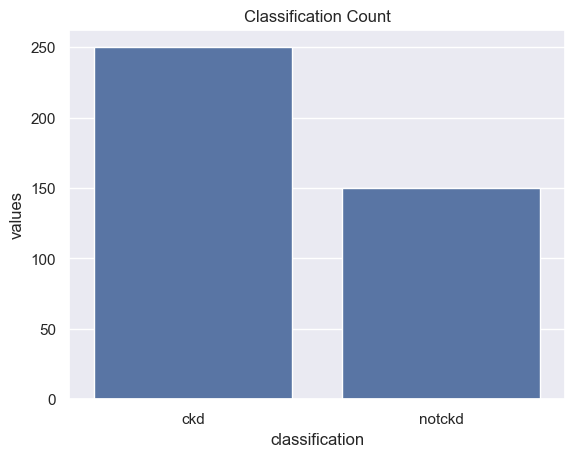

In [59]:
co_unt =dfc['classification'].value_counts() # count no of ckd and notckd
print(co_unt)
temp_df = pd.DataFrame({"classification": co_unt.index, 'values': co_unt.values})
# Create a bar plot
print(sns.barplot(x="classification",y= "values", data= temp_df))  
plt.title('Classification Count') 
plt.show()

### Insight: 
### A dataset that consists of one class is in the majority and if the class has above 90% weightage and another class has less than 10% weightage then the dataset is imbalanced. The imbalanced dataset is highly biased towards one class, it creates a problem to train our machine learning model. Machine learning is not able to identify minority class correctly.

### to fix that ckd and notckd count as SimpleImputer at the time of imputation convert whole columns as objeect columns then what happen at the time of encoding loosing the actual meaning of data

In [60]:
dfc.dtypes

age               object
bp                object
sg                object
al                object
su                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
rbc               object
pc                object
pcc               object
ba                object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [61]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

#### how sod normal , notnormal > flaot


### recover not object columns from imputed dataframe

In [62]:
df.select_dtypes(exclude=['object']).columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')

In [63]:
for i in df.select_dtypes(exclude=['object']).columns:
    dfc[i]=dfc[i].apply(lambda x: float(x))
dfc.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
rbc                object
pc                 object
pcc                object
ba                 object
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

#### visualization
* type of distribution
* type of corelation evry pair of attrribute or feature

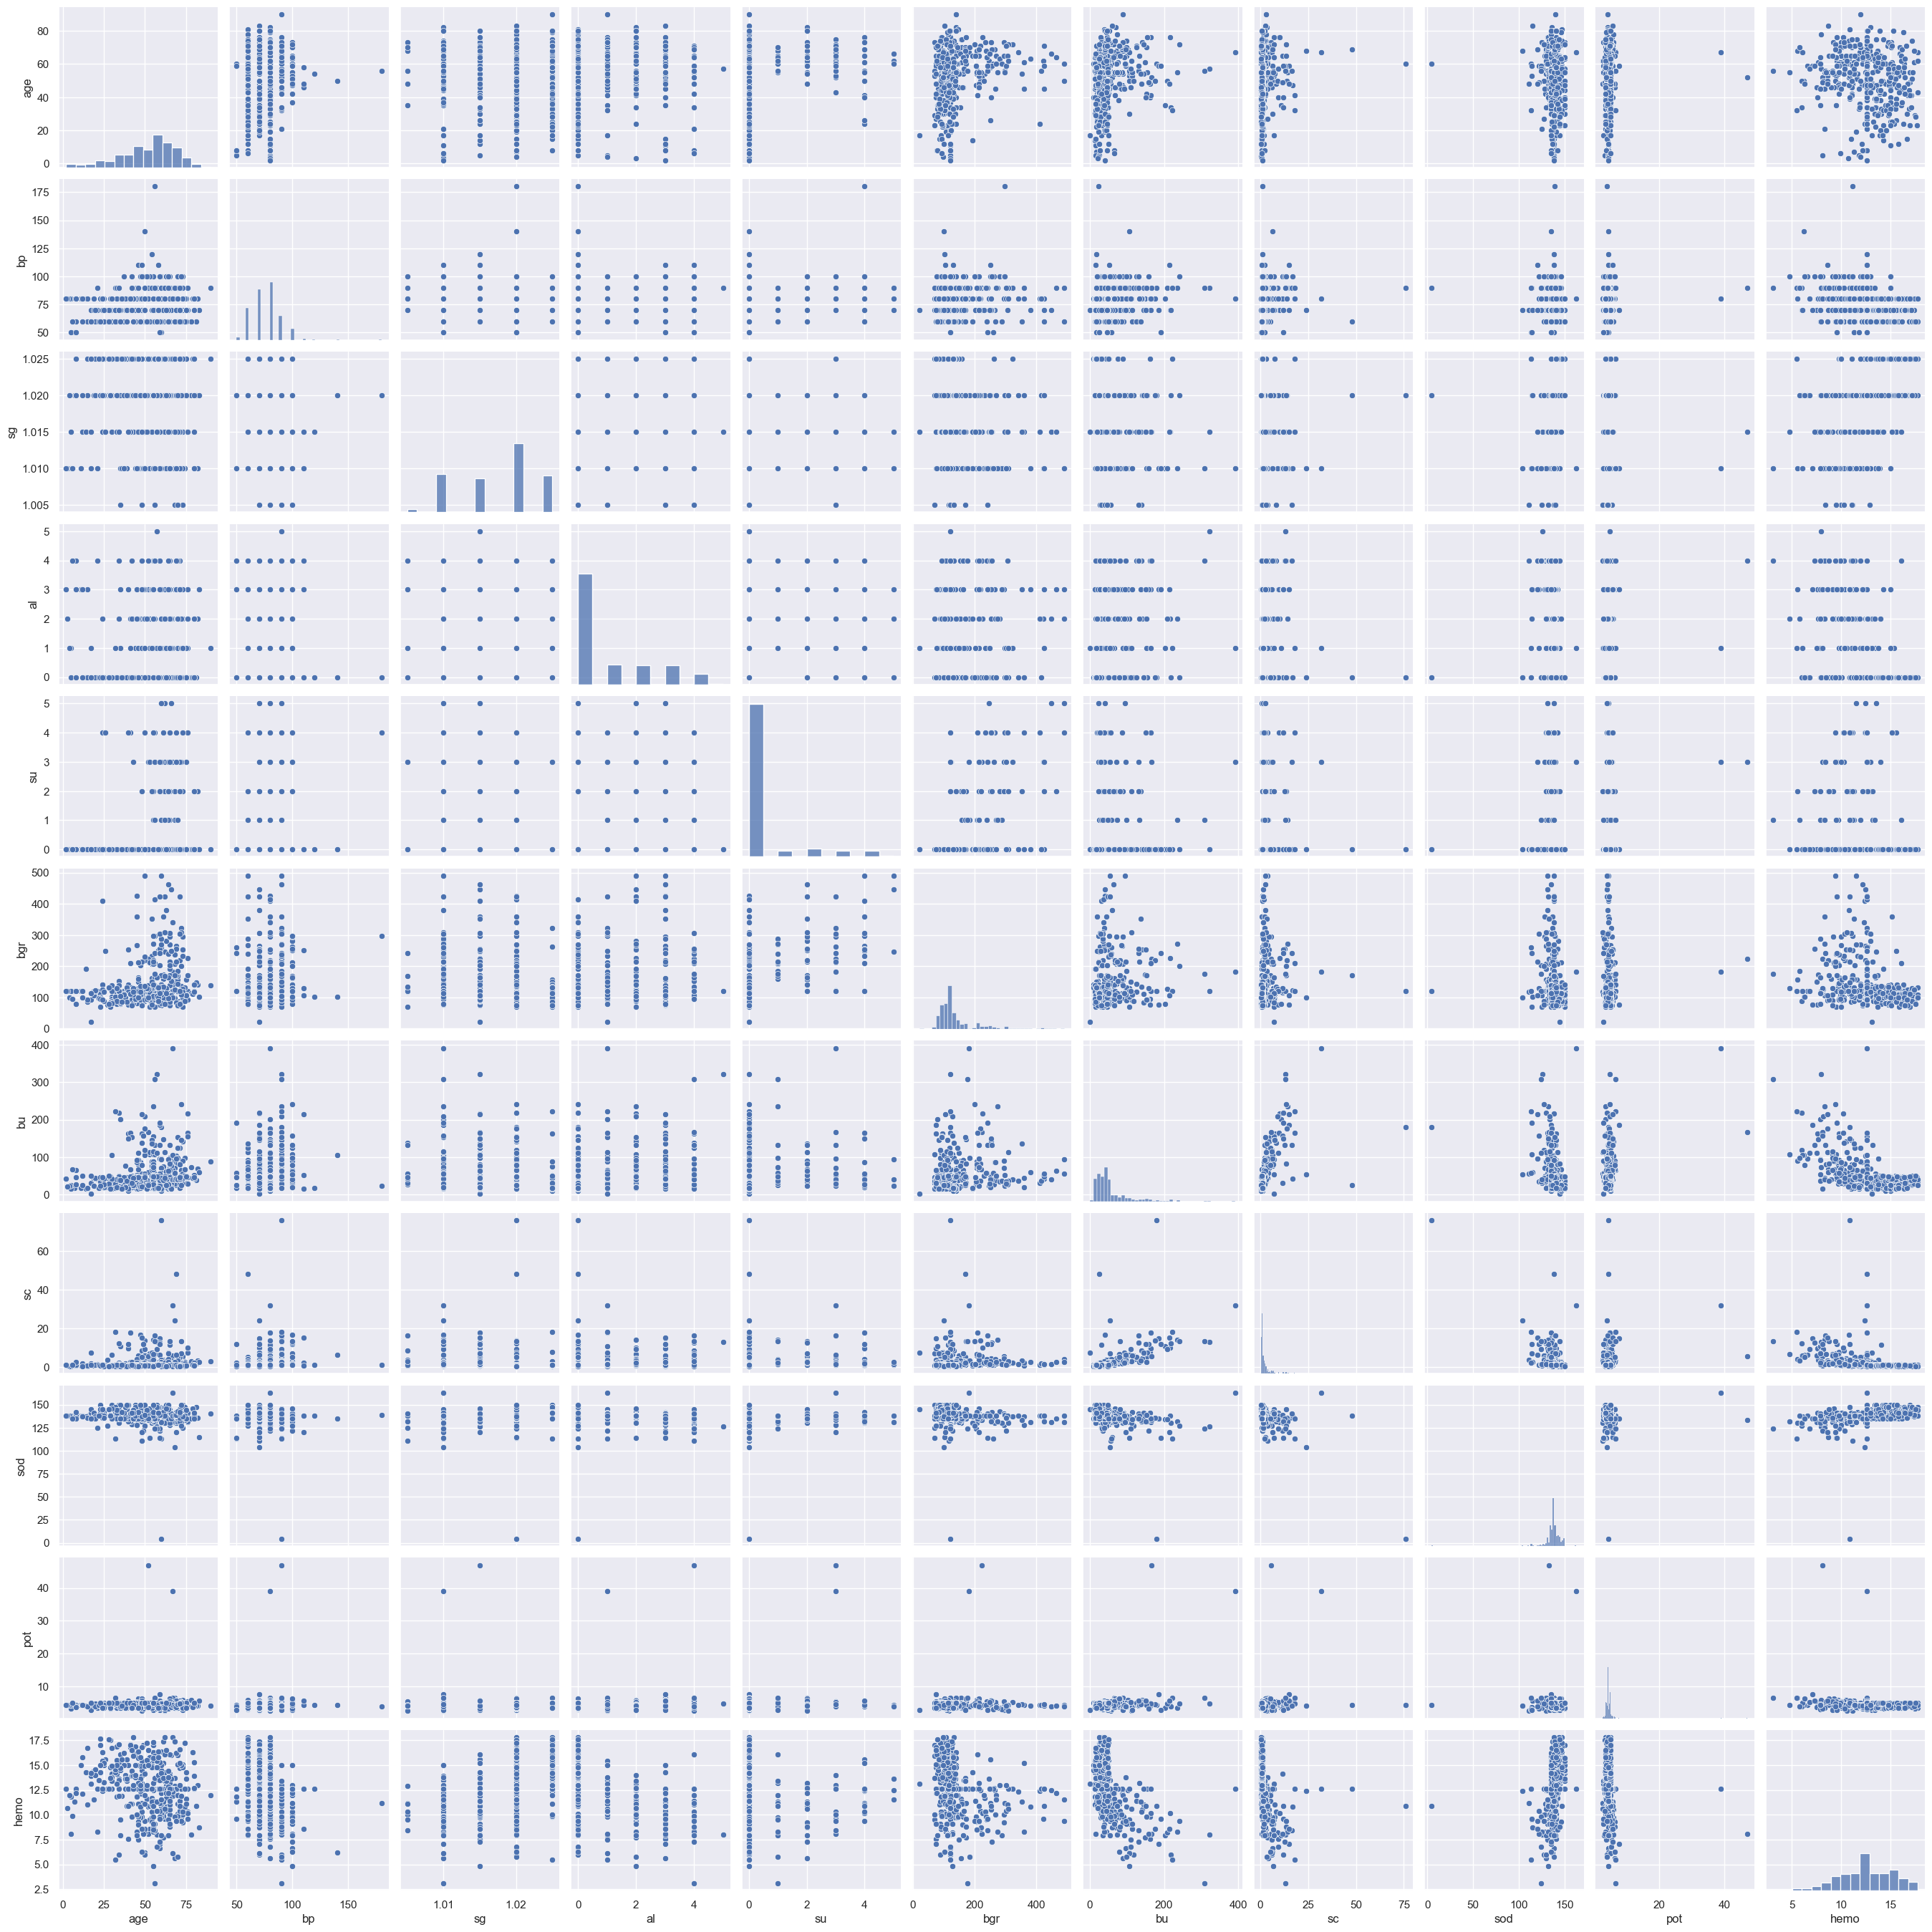

In [64]:
sns.pairplot(dfc)

insight : 
* straight line > categorical columns
* scatter > numerical columns

### Find the distribution of data using displot

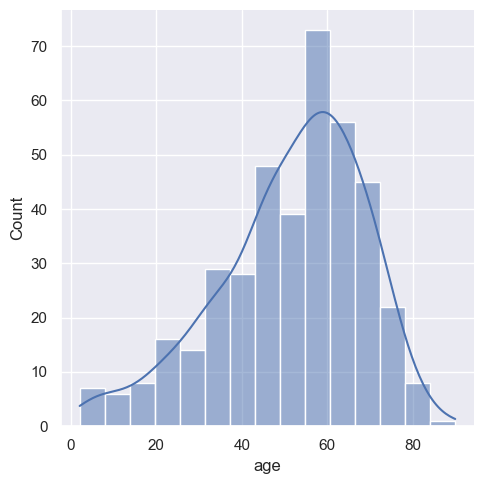

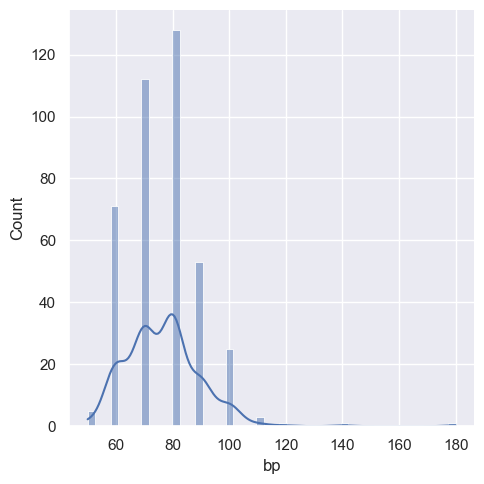

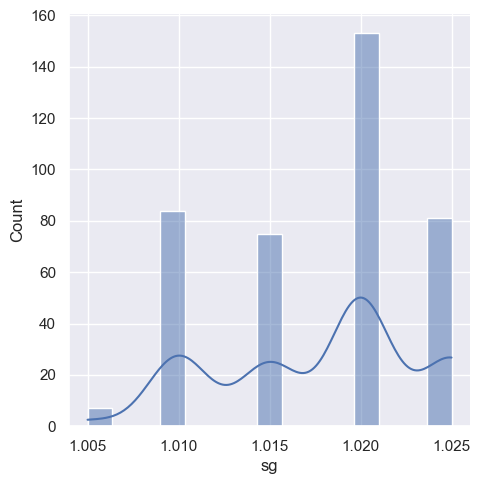

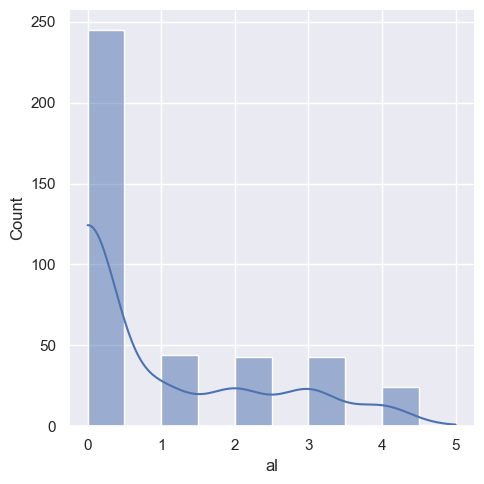

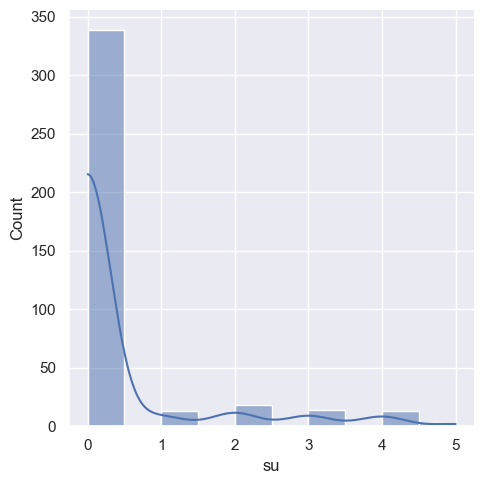

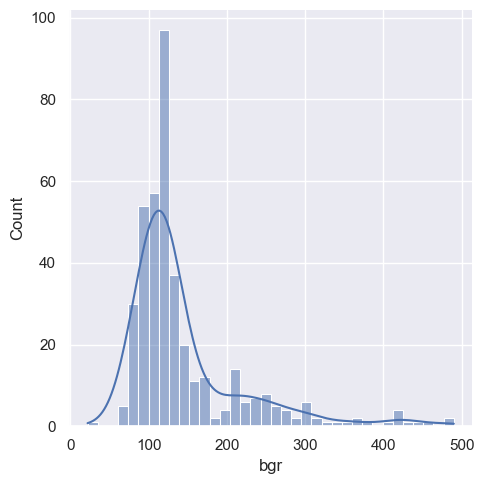

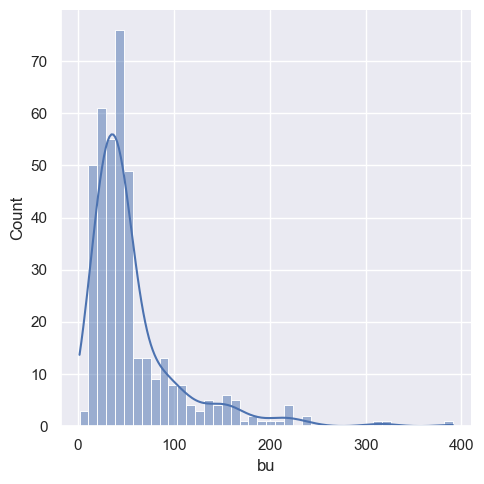

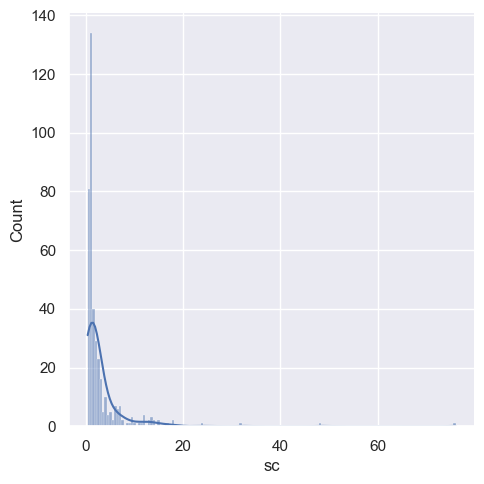

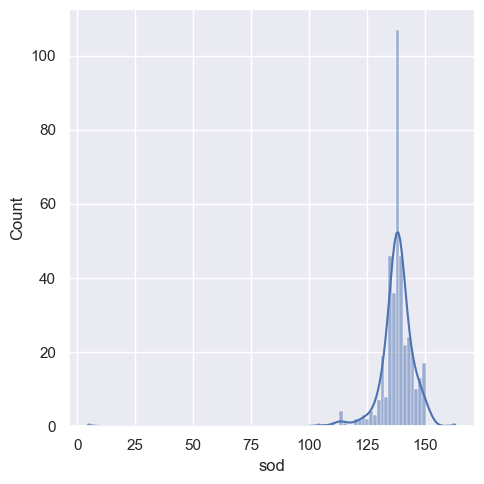

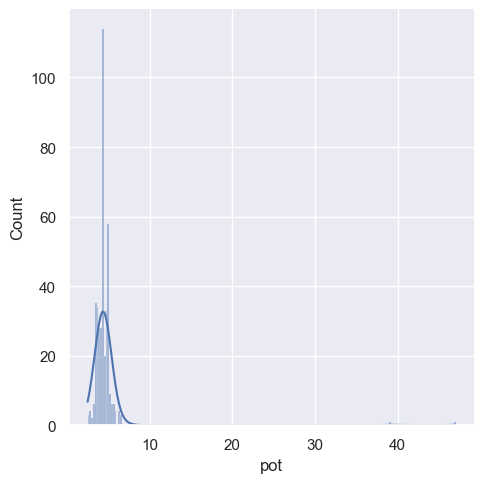

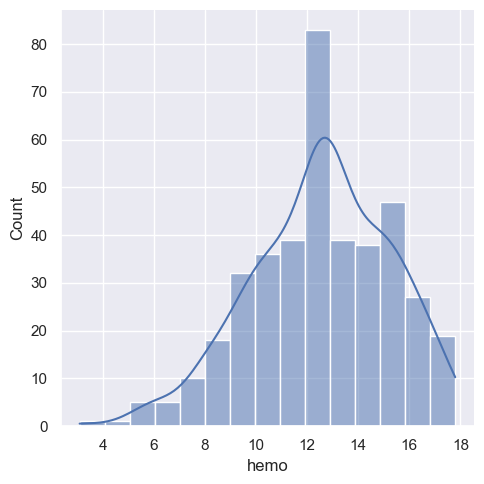

In [65]:
def displot(col):
    sns.displot(dfc[col],kde=True)
    plt.show()

for i in list(dfc.select_dtypes(exclude=['object']).columns):
    displot(i)


### insight : 
* most are normally distributed and some are skewed distributed

### Find and remove outliers of data using boxplot

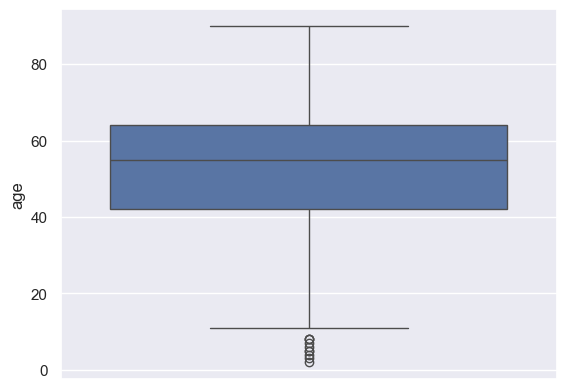

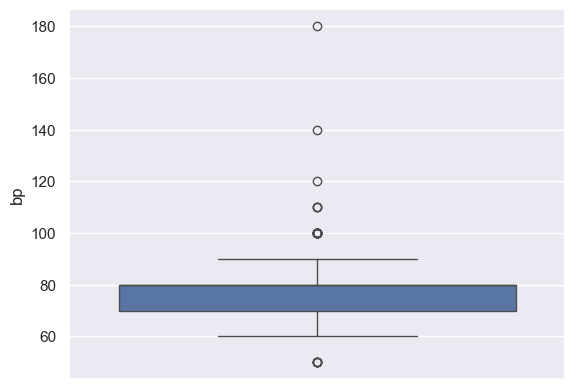

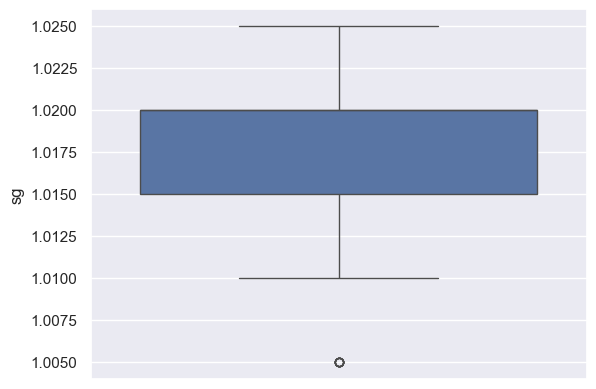

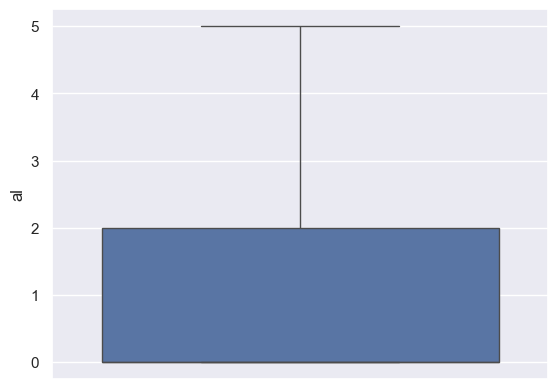

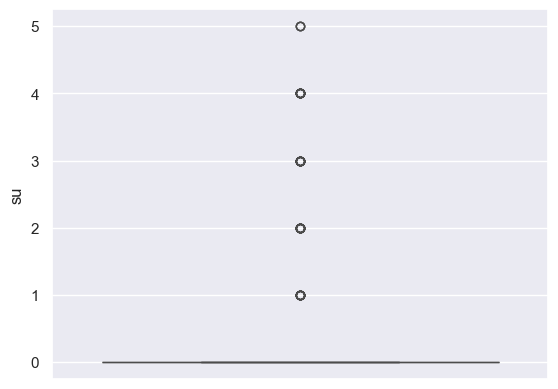

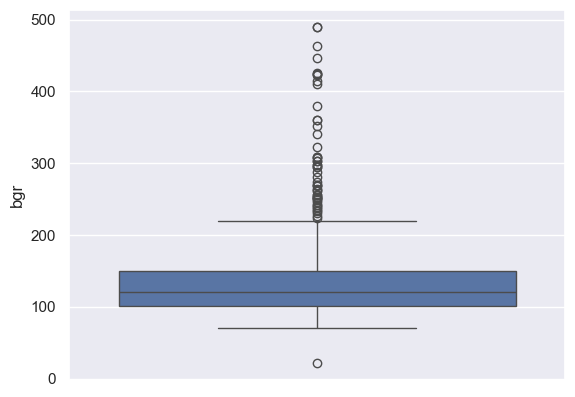

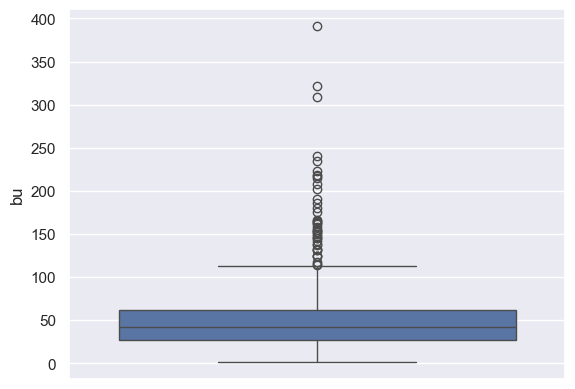

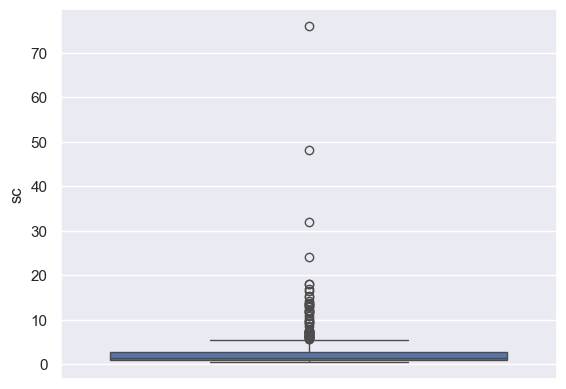

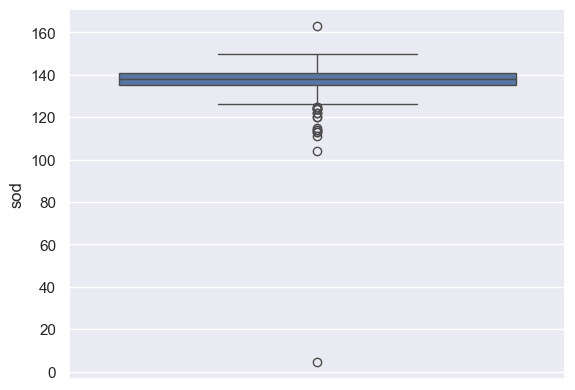

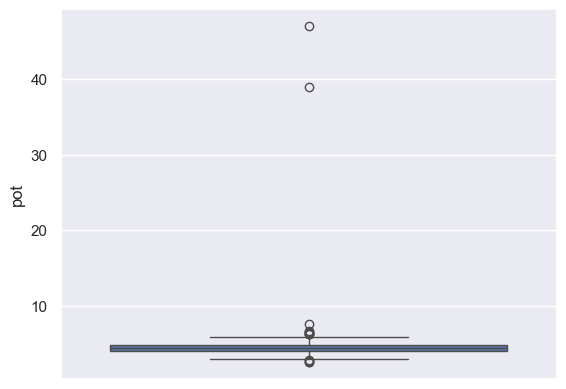

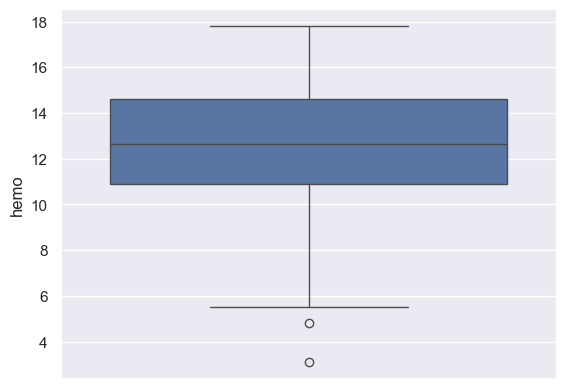

In [66]:
def boxplot(col):
    sns.boxplot(dfc[col])
    plt.show()

for i in list(dfc.select_dtypes(exclude=['object']).columns):  # only numeric columns
    boxplot(i)

### Insight:
* we dont have to do with outliers because according to medical proffesional these value actually may come i.e possible values

### Object/label Encoding : to cocnvert categorical values to numerical

In [67]:
dfc

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [68]:
df_enco = dfc.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,1,0,48,23,8,22,17,91,1,1,0,0,30,69,33,1,1,0,0,0,0,0
1,5,0,3,4,0,48,5,4,22,17,49,1,1,0,0,24,53,33,0,0,0,0,0,0,0
2,54,3,1,2,3,140,40,14,22,17,32,1,1,0,0,17,67,33,0,1,0,1,0,1,0
3,40,2,0,4,0,44,43,32,2,0,48,1,0,1,0,18,59,18,1,0,0,1,1,1,0
4,43,3,1,2,0,33,13,10,22,17,52,1,1,0,0,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,64,35,1,32,22,94,1,1,0,0,33,59,29,0,0,0,0,0,0,1
396,34,2,4,0,0,3,18,8,25,8,102,1,1,0,0,40,69,43,0,0,0,0,0,0,1
397,8,3,3,0,0,27,13,2,21,17,95,1,1,0,0,35,58,35,0,0,0,0,0,0,1
398,11,1,4,0,0,41,36,6,19,22,79,1,1,0,0,37,64,40,0,0,0,0,0,0,1


### save encoding to csv

In [69]:
df_enco.to_csv('kidney_disease_preprocessed.csv')

### Finding correlations

<Axes: >

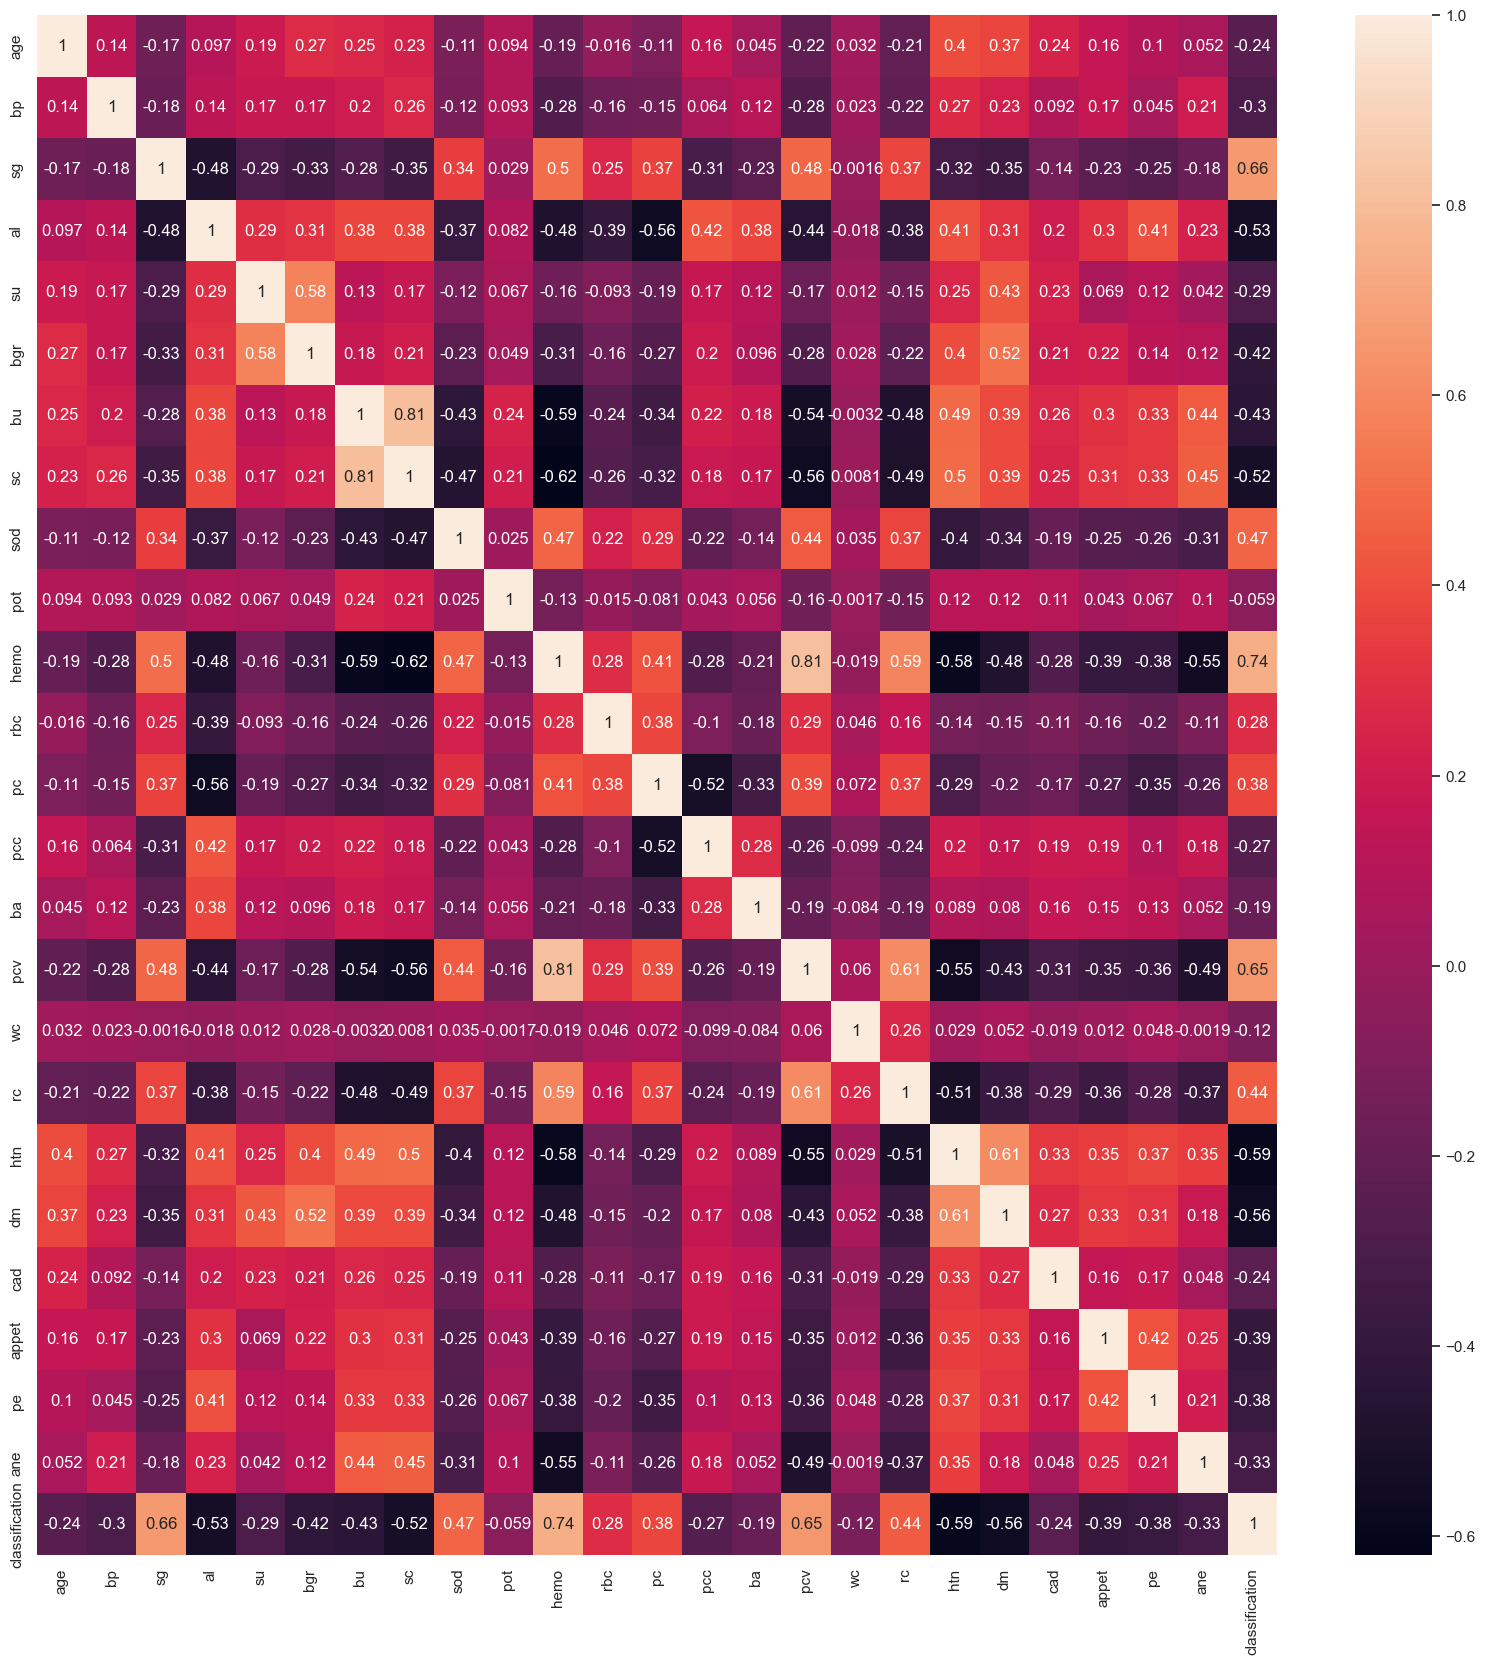

In [70]:
plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

###  if there are high correlation towards 1  between the two variables, we need to drop one
* as such correlation are not over there we need not drop any columns

### Split dependent and independent variables

In [71]:
X = df_enco.drop(["classification"],axis=1)  # independent varable
y = df_enco["classification"]

### detect the label balance

### Handling Imbalanced Datasets With imblearn Library
 * Imblearn library is specifically designed to deal with imbalanced datasets. It provides various methods like undersampling, oversampling, and SMOTE to handle and removing the imbalance from the datasetImblearn library is specifically designed to deal with imbalanced datasets.In machine learning problems, we often encounter with imbalanced datasets. Problems like fraud detection, claim prediction, churn prediction, anomaly detection, and outlier detection are the examples of classification problem which often consist of the imbalanced dataset. 

In [72]:
## conda install -c conda-forge imbalanced-learn
## pip install -U imbalanced-learn
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import  Counter


In [73]:
print(Counter(y)) #Counter is a subclass of dict that's specially designed for counting hashable objects in Python.

Counter({0: 250, 1: 150})


### let balance the labels

In [74]:
ros = RandomOverSampler() ## create object 
X_ros, y_ros = ros.fit_resample(X,y)
print(Counter(y_ros))


Counter({0: 250, 1: 250})


### Scaling

In [75]:
scaler = MinMaxScaler((-1,1)) # scale all the columns value between -1 to 1
X = scaler.fit_transform(X_ros)
y = y_ros
X

array([[ 0.06666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.33333333, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.28      , -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.52      , -0.33333333,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.52      , -0.77777778,  0.5       , ..., -1.        ,
        -1.        , -1.        ]])

### Dimensionality Reduction
#### Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.In machine learning, high-dimensional data refers to data with a large number of features or variables. The curse of dimensionality is a common problem in machine learning, where the performance of the model deteriorates as the number of features increases. This is because the complexity of the model increases with the number of features, and it becomes more difficult to find a good solution. In addition, high-dimensional data can also lead to overfitting, where the model fits the training data too closely and does not generalize well to new data.


### applying PCA > Principal component analysis

In [76]:
import plotly.offline as py  #The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
py.init_notebook_mode(connected=True) #This means one has to have an internet connection for the notebook to work, rendering the existence of connected=False moot.
import plotly.graph_objs as go #The plotly. graph_objects module (typically imported as go ) contains an automatically-generated hierarchy of Python classes which represent non-leaf nodes in this figure schema. The term "graph objects" refers to instances of these classes. The primary classes defined in the plotly.
import plotly.tools as tls
from sklearn.decomposition import  PCA #principal component analysis is a dimensionality reduction algorithm. Meaning it reduces the dimensionality of the feature space.

In [77]:
pca = PCA(.95)  ## his will select the number of components while preserving 95% of the variability in the Hence PCA will return the no of components which describe 95% of the variance. ...
X_pca = pca.fit_transform(X)
print(X.shape, X_pca.shape)

(500, 24) (500, 18)


In [138]:
pca.explained_variance_ratio_

array([0.37130246, 0.09271103, 0.0654363 , 0.0600454 , 0.05021053,
       0.04389917, 0.04109947, 0.03535734, 0.03039556, 0.02823046,
       0.02374679, 0.02099337, 0.02014183, 0.01887993, 0.01714989,
       0.01351251, 0.01188136, 0.01142696])

In [139]:
pca.explained_variance_


array([2.72673361, 0.6808419 , 0.48054453, 0.44095537, 0.36873102,
       0.3223823 , 0.30182218, 0.2596537 , 0.22321585, 0.20731597,
       0.17438929, 0.15416903, 0.14791551, 0.13864854, 0.12594361,
       0.09923184, 0.08725317, 0.08391618])

In [141]:
pca.n_components_

18

In [137]:
print(X_pca)

[[ 0.67216103 -1.63278997 -0.477495   ... -0.02532906 -0.32734804
  -0.07904612]
 [-0.82390101  0.54035712 -0.14044631 ... -0.33683437 -0.28011769
   1.16897674]
 [ 1.72976443 -0.50374224  0.44107296 ... -0.09549488 -0.39921401
   0.30257967]
 ...
 [-1.26018093  0.15401867 -0.06291449 ... -0.12250949 -0.0859493
  -0.19028746]
 [-1.41251069  0.02074428  0.08362471 ... -0.27326092  0.18668779
  -0.07580426]
 [-1.14859769 -0.1067627   0.08559708 ...  0.28178152  0.03965743
   0.23250648]]


### train test split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### creating Nural Network s using Keras deep learning
* here we not use rule based mode

In [79]:

import keras  #Keras is a deep learning API written in Python and capable of running on top of either JAX, TensorFlow, or PyTorch.
from keras.models import Sequential, Model #A Sequential model is appropriate for a plain stack of layers where
# each layer has exactly one input tensor and one output tensor.  A model grouping layers into an object with training/inference features.
from keras.layers import  Dense, Dropout #Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise 
#activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1 / (1 - rate) such that the sum over all inputs is unchanged.
from keras.callbacks import ModelCheckpoint, EarlyStopping  #ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.
# Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.
from keras.optimizers import Adam #Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
from sklearn.model_selection import KFold #K-Fold cross-validator.Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

### Creating the Classification Model

In [80]:
X_train.shape

(400, 18)

In [81]:
def model():
    classifier = Sequential() #simple sequential model layer connected where one input and one  output
    classifier.add(Dense(15,input_shape=(X_train.shape[1],),activation = 'relu')) # in put layer no of neuron equal to no of attribute=18
    ##depth ==15(number of layers) ,relu only give positive output
    classifier.add(Dropout(0.2)) ## we carry 80% of neuron to next layers
    classifier.add(Dense(15, activation='relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(1,activation='sigmoid'))  ## final  layer with sigmoid as it gives probability value 0 to 1 ,depth=1
    classifier.compile(loss="binary_crossentropy",optimizer="adam", metrics=['accuracy'])
    
    return classifier

### model summary

In [82]:
model = model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
(X_train.shape[1]+1)*15 # one bias parameter is added

285

### fit Model

In [105]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)
## The number of epochs is a hyperparameter that defines the number times that the learning algorithm will 
# work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.1
# verBose = It is used to set the logging level during the model training and validation process. The verbose argument can ]
# take one of three integer values: 0, 1, or 2. verbose=0 : Silent mode - no output during training. verbose=1 :
#  Progress bar mode - displays a progress bar with training and validation metrics (default).

Epoch 1/5
13/13 [==============================] - 0s 10ms/step - loss: 0.3949 - accuracy: 0.8850 - val_loss: 0.3578 - val_accuracy: 0.9400
Epoch 2/5


13/13 [==============================] - 0s 6ms/step - loss: 0.3501 - accuracy: 0.9200 - val_loss: 0.3237 - val_accuracy: 0.9400
Epoch 3/5
13/13 [==============================] - 0s 5ms/step - loss: 0.3345 - accuracy: 0.9075 - val_loss: 0.2919 - val_accuracy: 0.9400
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.3045 - accuracy: 0.9375 - val_loss: 0.2628 - val_accuracy: 0.9400
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.9275 - val_loss: 0.2378 - val_accuracy: 0.9500


### Insight:
* comapare accuracy, val_loss and val_accuracy how they change
* this should be accuracy directly proportional to val_accuracy and inversly proportional to val_loss
* if not then model is overfitting

### prediction

In [134]:
model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


array([[8.4729832e-01],
       [9.6142858e-02],
       [8.1887776e-01],
       [3.9970845e-01],
       [2.1697737e-02],
       [7.3116380e-01],
       [7.7785361e-01],
       [2.8703848e-01],
       [2.1289925e-01],
       [8.3415169e-01],
       [2.3880115e-02],
       [1.6538829e-02],
       [8.5722697e-01],
       [7.7547631e-03],
       [8.8592863e-01],
       [8.1732035e-01],
       [7.7785361e-01],
       [8.2082644e-02],
       [8.3172351e-01],
       [8.1877601e-01],
       [8.2268137e-01],
       [8.6636597e-01],
       [7.9671264e-01],
       [8.8340640e-01],
       [9.0494640e-03],
       [7.6727682e-01],
       [8.2300359e-01],
       [6.0788226e-01],
       [5.2774359e-02],
       [8.4118754e-01],
       [8.0007058e-01],
       [8.1268203e-01],
       [8.0160475e-01],
       [4.4639996e-01],
       [2.4563905e-02],
       [8.5201043e-01],
       [8.6614740e-01],
       [1.2304010e-01],
       [7.4920195e-01],
       [2.5227714e-01],
       [7.5253892e-01],
       [2.130746

In [ ]:
# model.predict([input list])

In [85]:
from sklearn.metrics import roc_curve #An ROC curve (receiver operating characteristic curve) is a graph showing the p
#erformance of a classification model at all classification thresholds
# 

In [86]:
from sklearn.metrics import auc ##A. AUC ROC stands for “Area Under the Curve” of the 
#“Receiver Operating Characteristic” curve. The AUC ROC curve is basically a way of measuring the performance of an ML model. AUC measures the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

In [87]:
from sklearn.metrics import classification_report #A classification report gives you a detailed breakdown
# of how well your model performs on each class, and how it balances the trade-off between precision and recall. It also shows you the number of instances (support) for each class, which can indicate the class imbalance or the size of the dataset.

In [88]:
from sklearn.metrics import accuracy_score #Here's the formula for calculating accuracy: 
#Accuracy = (Number of Correct Predictions) / (Total Number of Predictions) this can be 
# represented as: Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives).

In [89]:
from sklearn.metrics import precision_recall_curve #A precision-recall curve helps you decide a 
#threshold on the basis of the desirable values of precision and recall. It also comes in handy to compare different model performance by computi
#ng “Area Under the Precision-Recall Curve,” abbreviated as AUC.

In [91]:
from sklearn.metrics import average_precision_score #Average precision is the area under the PR(precision_recall_curve) curve.
# AP summarizes the PR Curve to one scalar value. Average precision is high when both precision
#  and recall are high, and low when either of them is low across a range of confidence threshold values. 
# The range for AP is between 0 to 1

In [92]:
from sklearn.metrics import f1_score #F1 score is a measure of the harmonic mean of precision 
#and recall. Commonly used as an evaluation metric in binary and multi-class classification, 
# the F1 score integrates precision and recall into a single metric to gain a better understanding of model performance. 

In [126]:
# the precision formula is as follows: Precision = True positives/ (True positives + False positives) In the same # # # fashion, students can write the formula of Accuracy, Accuracy = (True positives + True Negatives)/ (True positives ##+ True negatives + False positives + False negatives)
# Recall = True Positive (TP) / True Positive (TP) + False Negative (FN) where, True Positive (TP) = Represents the # # number of positive instances correctly identified by the model.


#### function to plot the roc_curve

In [94]:
def plot_auc(t_y,p_y):
    fpr,tpr,thresholds =  roc_curve(t_y, p_y, pos_label=1)
    fig, C_ax = plt.subplots(figsize=(9,9))
    C_ax.plot(fpr,tpr,label='%s (AUC: %0.2f)' % ('classification',auc(fpr,tpr)))
    C_ax.plot([0,1],[0,1],color= 'red', linestyle='--')
    C_ax.legend()
    C_ax.set_xlabel('False Positive  Rate')
    C_ax.set_ylabel('True Positive Rate')
    

### function to plot the precision_recall_curve

In [95]:
def plot_precision_recall_curve_helper(t_y,p_y):
    fig,C_ax = plt.subplots(1,1, figsize= (9,9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y, pos_label=1)
    C_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)' % ('classification',aps))
    C_ax.plot(recall, precision, color='red',lw=2)
    C_ax.legend()
    C_ax.set_xlabel('Recall')
    C_ax.set_ylabel('Precision')

### function to plot the history

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history(history):
    f =plt.figure()
    f.set_figwidth(15)

    f.add_subplot(1,2,1)
    plt.plot(history.history['val_loss'], label='val loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.legend()
    plt.ylabel('Loss')

    f.add_subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.legend()
    plt.title("Model Accuracy")

    plt.show()

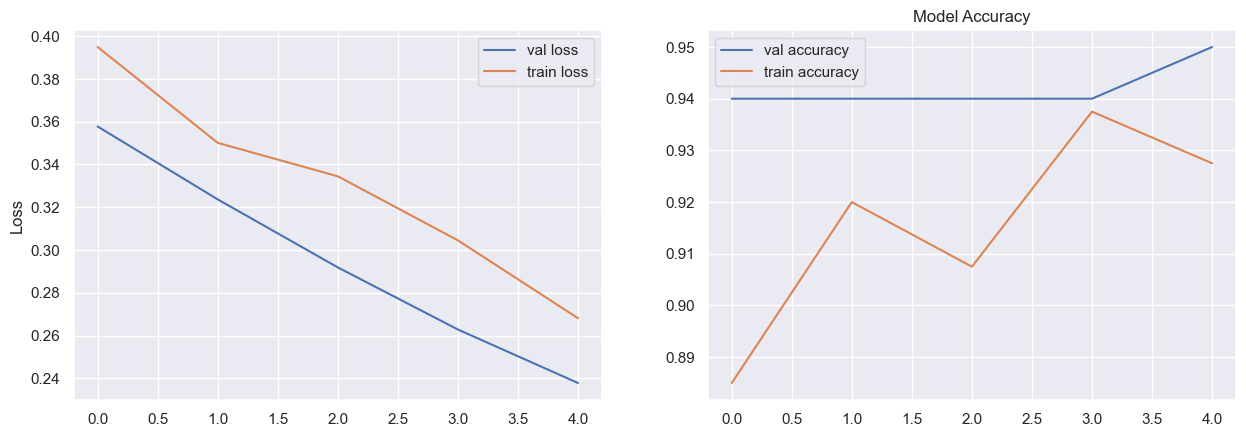

In [121]:
hist = plot_history(history)
hist

4/4 [==============================] - 0s 2ms/step


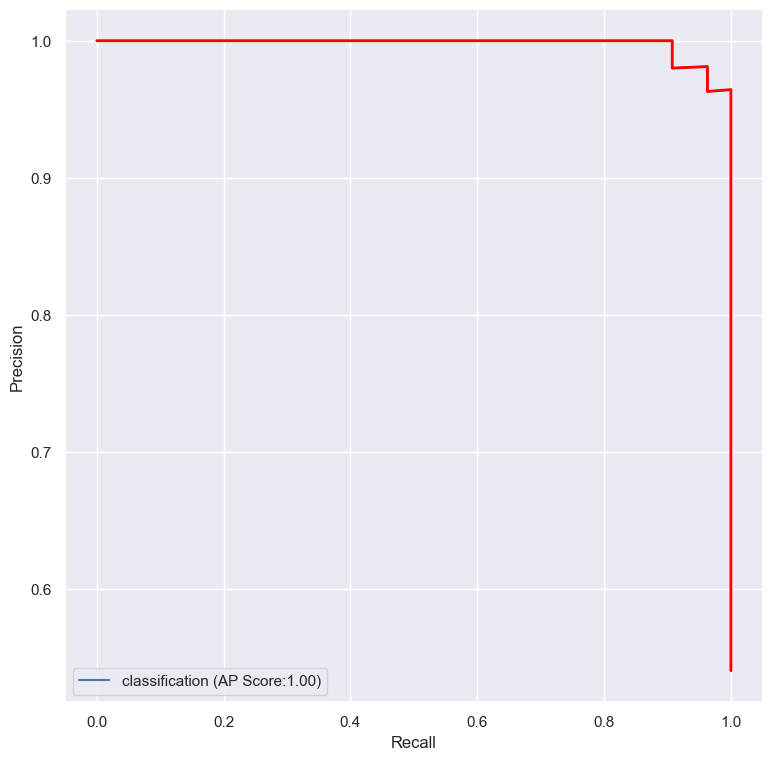

In [122]:
plot_precision_recall_curve_helper(y_test,model.predict(X_test,verbose=True))

4/4 [==============================] - 0s 2ms/step


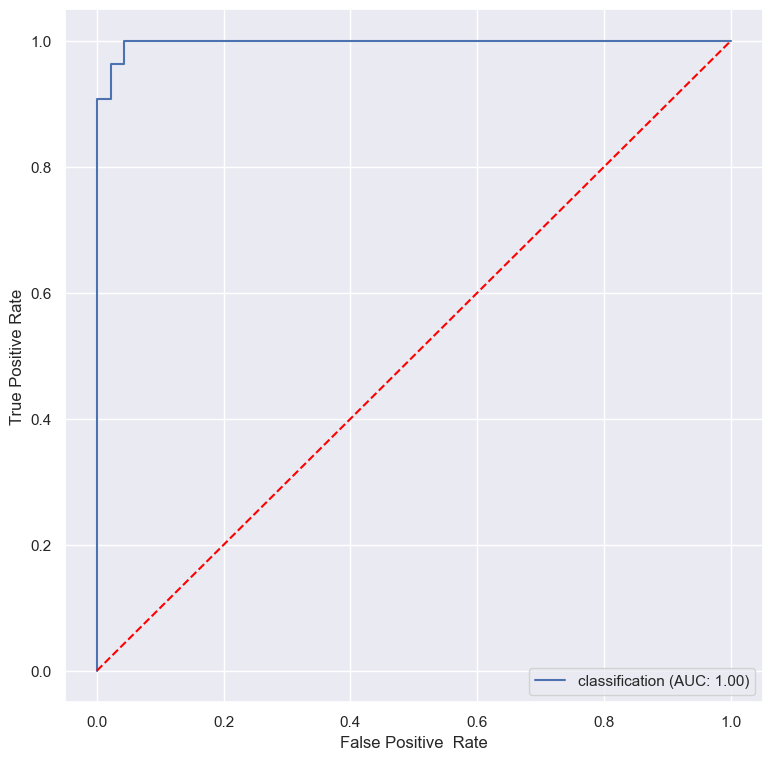

In [125]:
plot_auc(y_test, model.predict(X_test, verbose=True))

### Calculate F1 score

In [132]:
## find the threshold that optimize your model's performance,
## and use that threshold to mute binary classification m

def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall) if prec and recall  else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test, verbose=True)) #inbuilt function
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1score)
threshold = thresholds[idx]
print('*'*100)
print('Precision:' + str(precision[idx]))
print('Recall:' + str(recall[idx]))
print('Threshold:' + str(thresholds[idx]))
print('f1 Score:' + str(f1score[idx]))


4/4 [==============================] - 0s 3ms/step
****************************************************************************************************
Precision:0.9642857142857143
Recall:1.0
Threshold:0.7311638
f1 Score:0.9818181818181818


### threshold vs f1 score

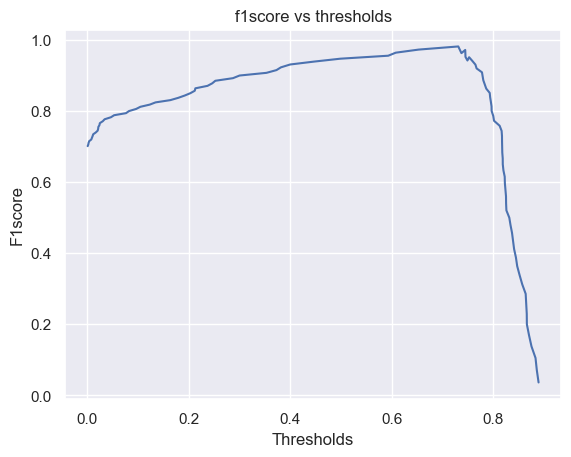

In [133]:
plt.figure()
plt.plot(thresholds,f1score)
plt.title('f1score vs thresholds')
plt.xlabel('Thresholds')
plt.ylabel('F1score')
plt.show()

### Insight :
* after thresholds value , f1 score value start dropping, upto which algorithm work properly

### create pipeline

In [ ]:
## in pipeline first split into train and test data then apply pipeline for both train and test data

## cat missing values replace by most frequent
# num_pipeline = Pipeline(
#     steps=[
#         ('imputer',SimpleImputer(strategy="median")),
#         ("scaler ", StandardScaler())
#     ]
# )
# cat_pipeline  = Pipeline(
#     steps =[
#         ('imputer',SimpleImputer(strategy= "most_frequent")),
#         ("one_hot_encoder", OneHotEncoder()),
#         ("scaler",StandardScaler(with_mean=False))
#     ]

# )
# preprocessor = ColumnTransformer(
#     [
#         ('num_pipeline', num_pipeline, num_cols),
#         ('cat_cols',cat_pipeline, cat_cols)
#     ]
# )

# preprocessor # object






In [ ]:
# pre_df = preprocessor.fit_transform(df)

In [ ]:
# pre_df ##array 2d = matrtix

In [ ]:
# print(pre_df)

In [ ]:
# df2 = pd.DataFrame(pre_df)

In [ ]:
# df2.head()